problem statement - Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [1]:
#he searching for locations with high investment chances
#prefred_location_of_friends =[banglore , Mumbai,NCR]
# NCR has Gurgaon, Noida and New Delhi

# we need to find the loaction amoung these where the number of investment are high 
# plot a bar graph between location and number of fundings
# change "bangalore" to "Bangalore"

# also some startps has multiple locations some indians and foreign if any city lies in this consider that also 

In [124]:
def sepreate_city(String):
    return String.split('/')[0].strip()

In [132]:
def check(st):
    pre_city = ["Banglore","Mumbai","New Delhi","Gurgaon","Noida"]
    ans = st in pre_city
    return ans
    

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46

the city with the maximum number of startps is Bangalore with the number of investments 412


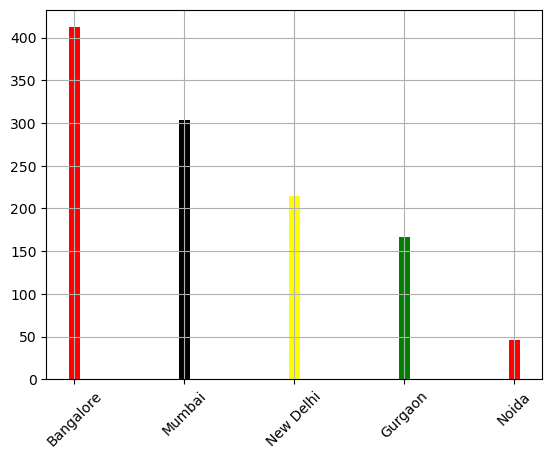

In [181]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

data = pd.read_csv("startup_funding.csv",encoding ="utf-8")

data = data.dropna(subset=['CityLocation',"AmountInUSD"])

data['CityLocation']=data['CityLocation'].apply(sepreate_city)
data['CityLocation'] = data['CityLocation'].replace(['Delhi','bangalore'],['New Delhi','Bangalore'])
df=data[(data['CityLocation']=='Bangalore')|(data['CityLocation']=='Mumbai')|(data['CityLocation']=='Gurgaon')|(data['CityLocation']=='Noida')|(data['CityLocation']=='New Delhi')]
df=df.groupby(by='CityLocation').size()
df.sort_values(ascending =False , inplace = True)

city = df.index
value = df.values

for i,j in zip(city,value):
    print(i,j)
print()

print("the city with the maximum number of startps is",city[0],"with the number of investments",value[0])

# plotting the bargraph 
plt.bar(city,value,width = 0.1,color =["red","black","yellow","green"])
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [174]:
# #find the top investors that has invested maximum number of times
# # also we need to ingnore the undisclosed investors

# import csv
# import numpy as np
# with open('startup_funding.csv', encoding='utf8') as file_obj:
#     file_data=csv.DictReader(file_obj, skipinitialspace=True)
#     investors=[]
#     for row in file_data:
#         # not taking the undisclosed investors
#         # the Investor name not should be blank
#         if(row["InvestorsName"] !='') and (row["AmountInUSD"]!="NaN"):
#             if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
#                 for i in row['InvestorsName'].split(','):
#                     investors.append(i.strip())
#     dic=dict()
#     # making a dictonary with investors name and their count
#     for i in investors:
#         if i in dic.keys():
#             dic[i]+=1
#         else:
#             dic[i]=1
#     x=[] # this list contain the names of investors
#     y=[] #this list will contain the frequency of investors
#     for i in dic.keys():
#         x.append(i)
#         y.append(dic[i])
#     np_x=np.array(x) #making an numpy array from list
#     np_y=np.array(y) #making an numpy array form list
#     np_x=np_x[np.argsort(np_y)]  # we are using argsort to sort the frequecy of inversors(sorting the y list)
#     np_y=np.sort(np_y) # appling the indexing after sorting in x list 
    
#     np_y=np_y[::-1]  # reversing the list
#     np_x=np_x[::-1]  # reversing the list
#     np_x =np_x[:5] # slicing to get only 5 values
#     np_y =np_y[:5] # slicing to get only 5 values
#     for i,j in zip(np_x,np_y):
#         print(i,j)
# plt.pie(np_y,labels=np_x,autopct='%0.2f%%',counterclock=False,startangle=110,explode=[0.2,0.15,0.1,0.05,0.01])
# plt.title('Top 5 Investors')
# plt.show()

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


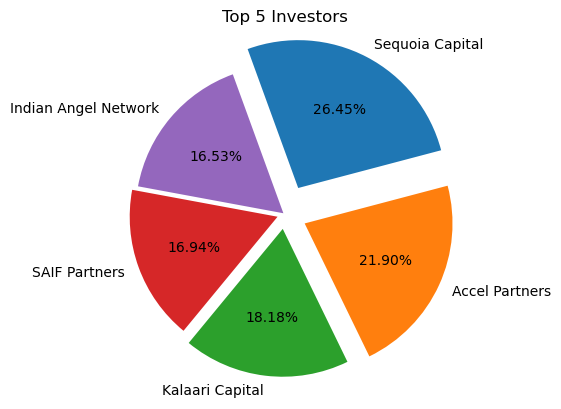

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName'])
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

investors = df.InvestorsName
investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
            
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1

dct_keys = sorted(dct,key=dct.get,reverse=True)
c=0
Inv_name=[]
count=[]
for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    Inv_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break

plt.pie(count,labels=Inv_name,autopct='%0.2f%%',counterclock=False,startangle=110,explode=[0.2,0.15,0.1,0.05,0.01])
plt.title('Top 5 Investors')
plt.show()

In [18]:
# so form the previos cell exectution Sequoia Capital is the best investor for my friend as he had invested the maximum time

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

In [146]:
# #the top 5 investors who have invested in different number of startups
# #Find the top 5 investors who have invested maximum number of times in different companies
# # if one investor has invested multiple times in one startup, count one for that company. 
# #There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm


# import pandas as pd
# import csv
# import numpy as np
# def s(string):
#     return string.split(',')

# data = pd.read_csv("startup_funding.csv",encoding= "utf-8",na_values="?")

# #changing some major startup names
# data["StartupName"] = data["StartupName"].replace(['Flipkart.com','Ola Cabs','Olacabs','Oyo Rooms','Oyorooms','OyoRooms','Paytm Marketplace'],['Flipkart','Ola','Ola','Oyo','Oyo','Oyo','Paytm'])
# data["InvestorsName"] = data["InvestorsName"].apply(s)
# df = data.groupby(by=["InvestorsName","StartupName"]).sum()
    

Sequoia Capital 49
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


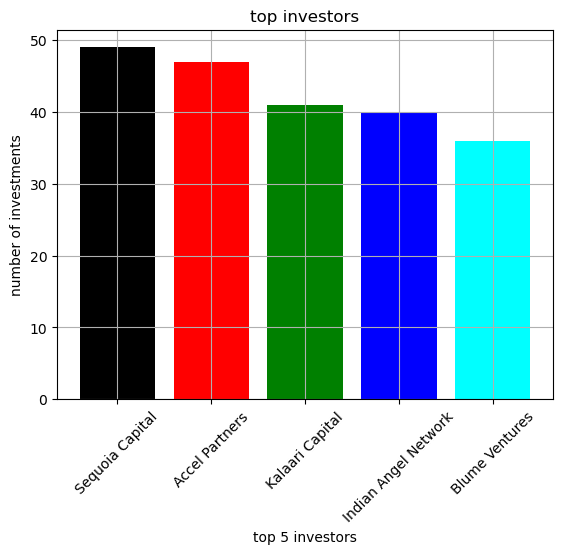

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


df = pd.read_csv('startup_funding.csv',encoding='utf-8')
df.dropna(subset=['StartupName','InvestorsName'])
df["StartupName"] = df["StartupName"].replace(['Flipkart.com','Ola Cabs','Olacabs','Oyo Rooms','Oyorooms','OyoRooms','Paytm Marketplace'],['Flipkart','Ola','Ola','Oyo','Oyo','Oyo','Paytm'])
# removing undisclosed investors
df = df[(df.InvestorsName != 'Undisclosed Investors')]
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

name =[]
startup=[]

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            name.append(j)
            startup.append(v)
df1 = pd.DataFrame({'InvestorsName' :name,'StartupName' : startup})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)

#print(df1)

n=[]
v=[]

for i in range(5):
    print(df1.index[i],df1.values[i])
    n.append(df1.index[i])
    v.append(df1.values[i])
plt.bar(n,v,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(rotation = 45)
plt.xlabel("top 5 investors")
plt.ylabel("number of investments")
plt.grid()
plt.title("top investors")
plt.show()

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


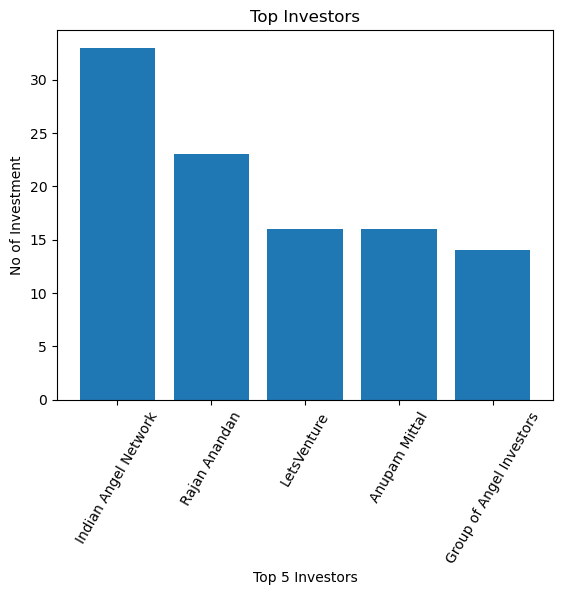

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Oyorooms','OyoRooms','Oyo Rooms','OYO Rooms','Olacabs','Ola Cabs','Olacabs','Flipkart.com','Paytm Marketplace'],['Oyo','Oyo','Oyo','Oyo','Ola','Ola','Ola','Flipkart','Paytm'],inplace=True)


df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
df['InvestmentType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)


df = df[(df.InvestmentType =="Crowd Funding")|(df.InvestmentType=="Seed Funding")]


startup_name =[]
investor_name=[]

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investment')
plt.title('Top Investors')
plt.show()

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


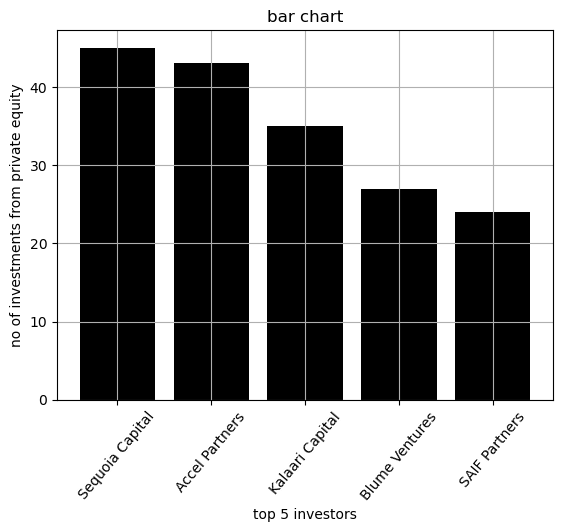

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Oyorooms','OyoRooms','Oyo Rooms','OYO Rooms','Olacabs','Ola Cabs','Olacabs','Flipkart.com','Paytm Marketplace'],['Oyo','Oyo','Oyo','Oyo','Ola','Ola','Ola','Flipkart','Paytm'],inplace=True)


df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']
df['InvestmentType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)


# now considering only private equility

df = df[df.InvestmentType == 'Private Equity']

# same approach with now we will make the list of investors name and startup names
investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)
            

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
# now plotting the graphs 
plt.bar(name,count,color = "black")
plt.xticks(rotation = 50)
plt.xlabel("top 5 investors")
plt.ylabel("no of investments from private equity")
plt.title("bar chart")
plt.grid()
plt.show()